<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/Clustering_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [31]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
df_copy = df.copy()

In [33]:
df.drop(['ID#'],axis=1,inplace=True)

In [34]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [36]:
df.drop(['Award?'],axis=1,inplace=True)

I have decided to drop the award section because it represents an outcome of customer behavior rather than an intrinsic behavioral attribute.
It can be used after clustering to profile customers.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


In [38]:
df_cols = df.columns

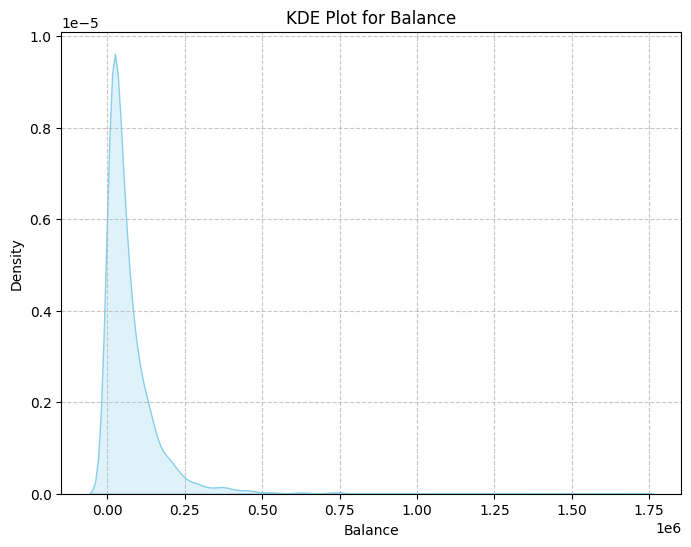

In [39]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['Balance'], fill=True, color='skyblue')
plt.title('KDE Plot for Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


As expected, the balance column is right skewed. This is because a few travellers travel a lot compared to other travellers and therefore collect more miles.  

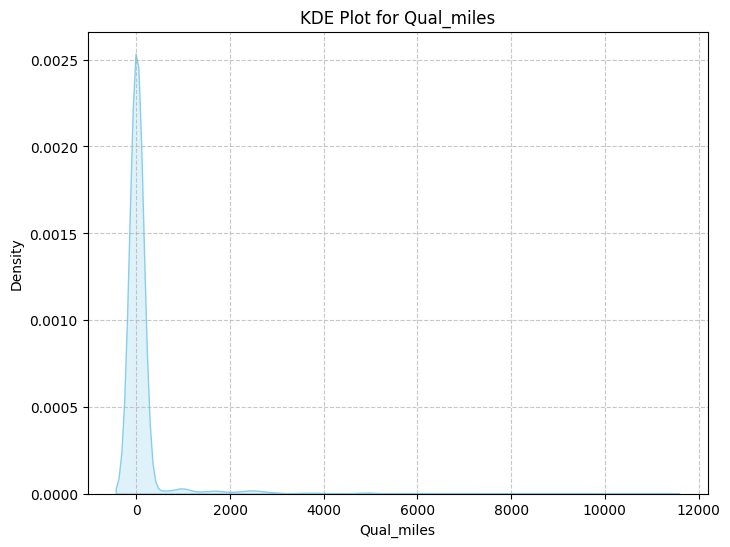

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['Qual_miles'], fill=True, color='skyblue')
plt.title('KDE Plot for Qual_miles')
plt.xlabel('Qual_miles')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Qualmiles is also skewed with a lot of zeroes. This is because most customers dont have a lot of qualifying miles.

<Axes: xlabel='cc1_miles', ylabel='count'>

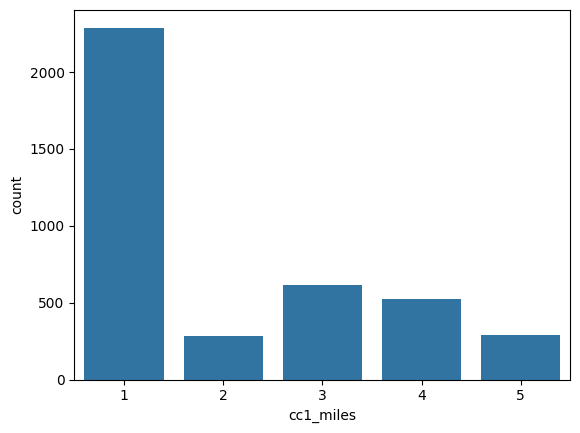

In [41]:
sns.countplot(x='cc1_miles', data=df)


cc1_miles is a orfinal variable where order matters.
Most customers fall in the 1 category.

<Axes: xlabel='cc2_miles', ylabel='count'>

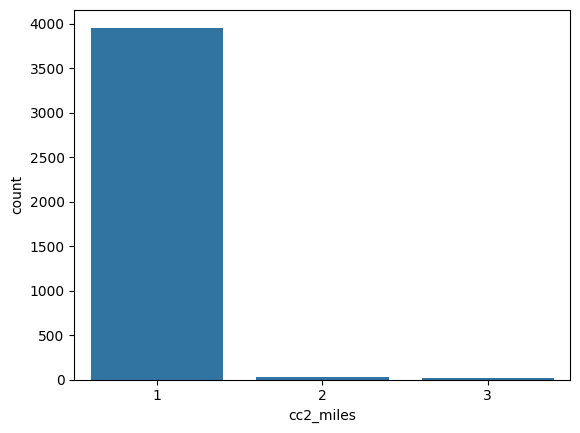

In [42]:
sns.countplot(x='cc2_miles', data=df)


Same as cc1_miles, this is also a ordinal variable and should be treated as such.
This behaviour is seen as most people rarely use credit that are issued by airlines.

<Axes: xlabel='cc3_miles', ylabel='count'>

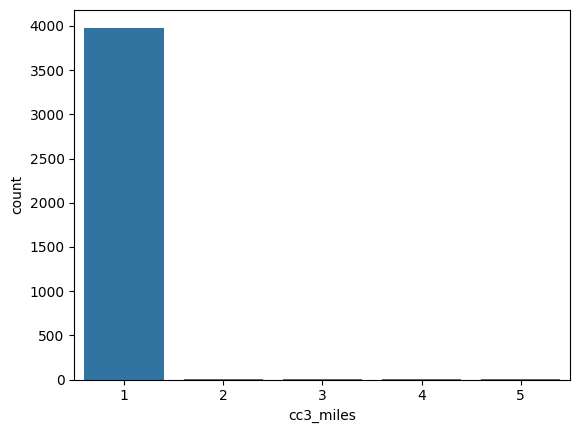

In [43]:
sns.countplot(x='cc3_miles', data=df)


Same as cc3_miles, this is also an ordinal variable.

<Axes: xlabel='Bonus_miles', ylabel='Density'>

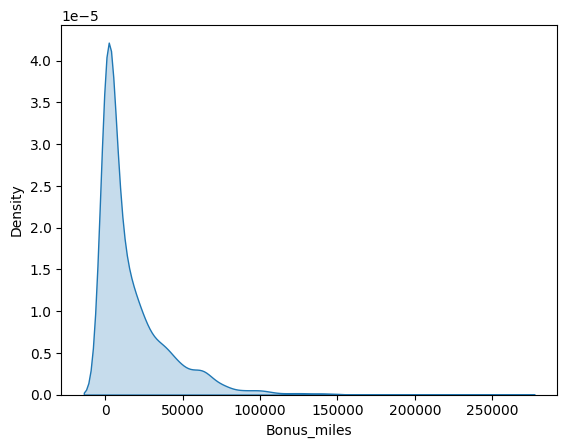

In [44]:
sns.kdeplot(x=df['Bonus_miles'], fill=True)


Same pattern can be seen in bonus miles, same as balance.
Most customers earn very few bonus miles whereas some users earn a lot of bonus miles. This can be seen using the kde plot.

<Axes: xlabel='Bonus_trans', ylabel='Density'>

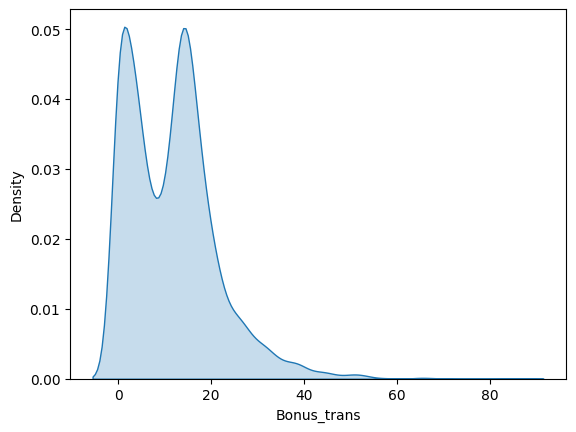

In [45]:
sns.kdeplot(x=df['Bonus_trans'], fill=True)


A bimodal graph suggests that there are 2 customer segments with different behaviours.

<Axes: xlabel='Flight_miles_12mo', ylabel='Density'>

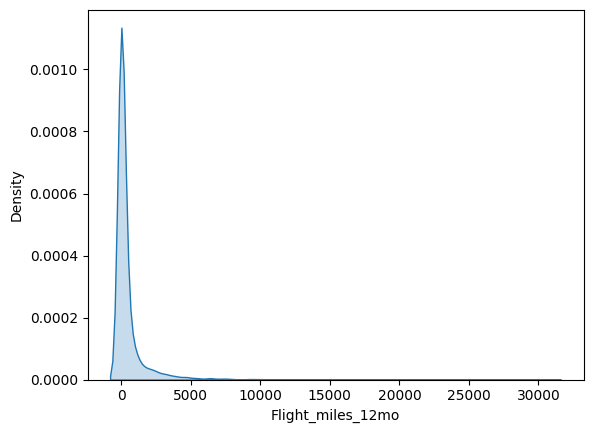

In [46]:
sns.kdeplot(x=df['Flight_miles_12mo'], fill=True)

This graph is also right skewed because most customers fly rarely but some customers fly alot.

<Axes: xlabel='Flight_trans_12', ylabel='Count'>

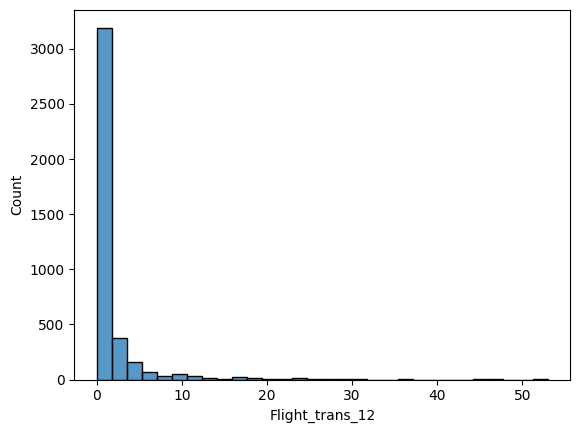

In [47]:
sns.histplot(df['Flight_trans_12'], bins=30)

Similar pattern, most people fly rarely, few people fly very often, skewing the graph.

<Axes: xlabel='Days_since_enroll', ylabel='Density'>

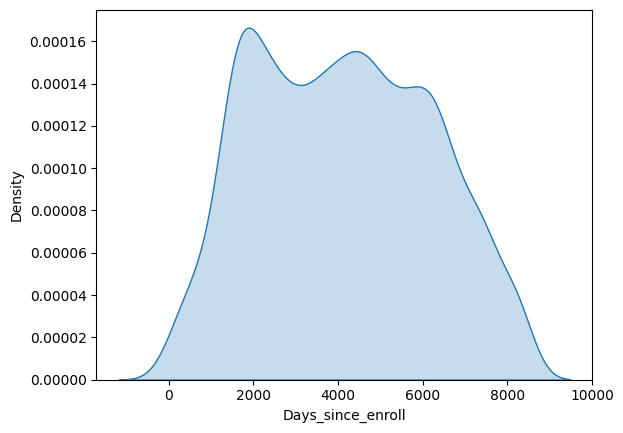

In [48]:
sns.kdeplot(x=df['Days_since_enroll'], fill=True)


In [49]:
corr = df.corr()

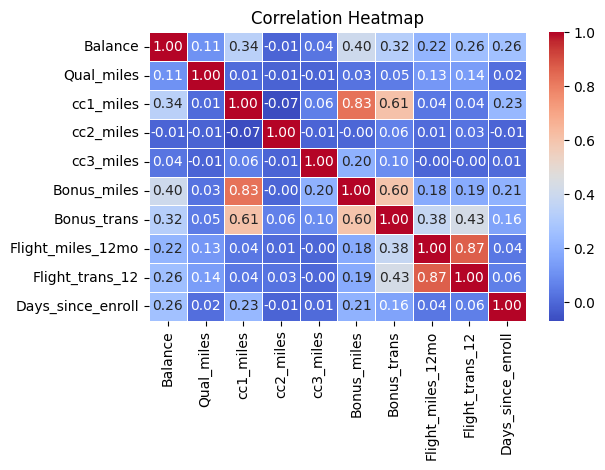

In [50]:
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

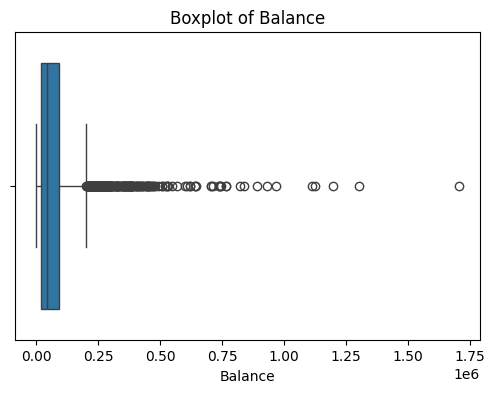

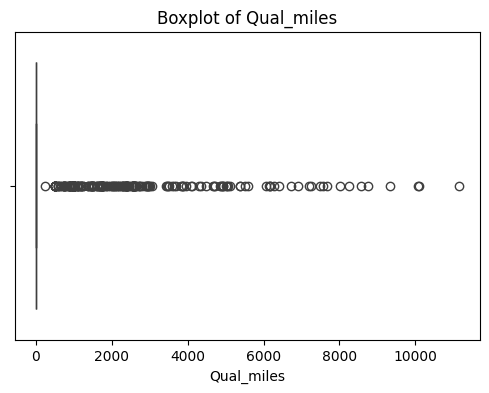

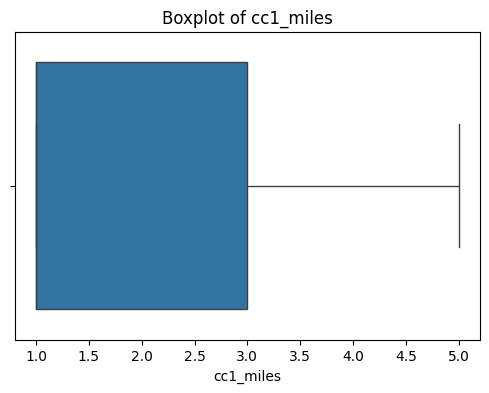

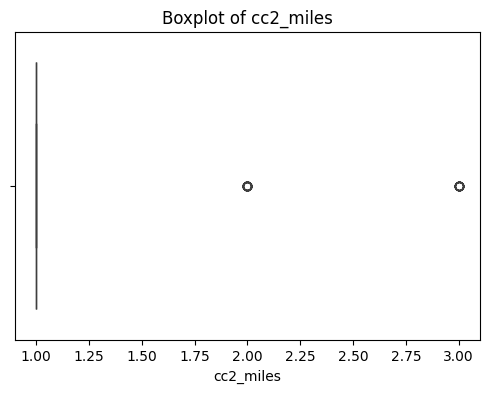

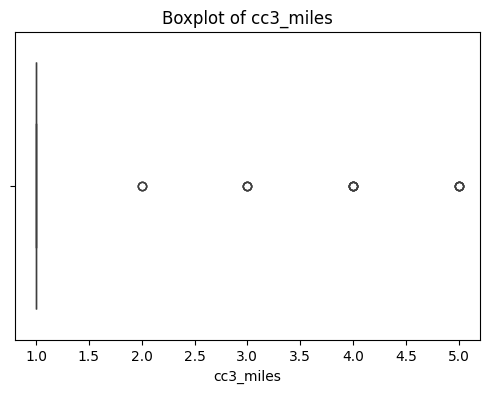

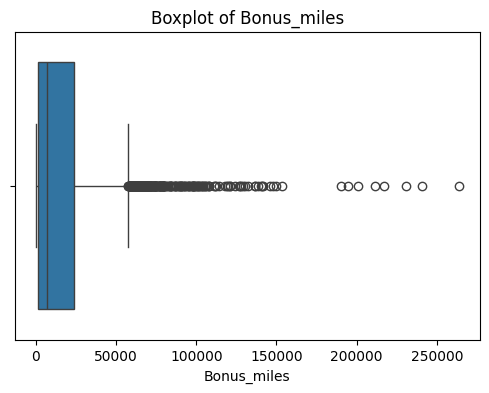

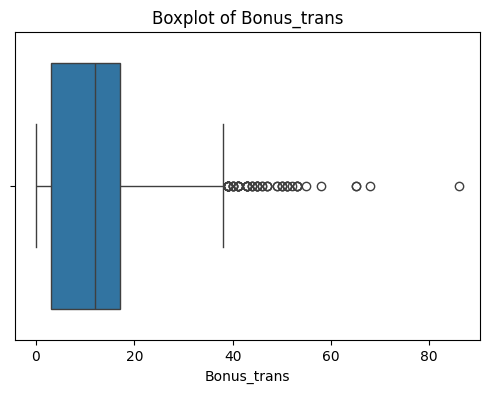

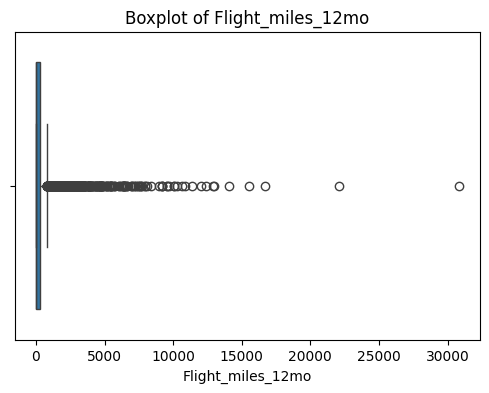

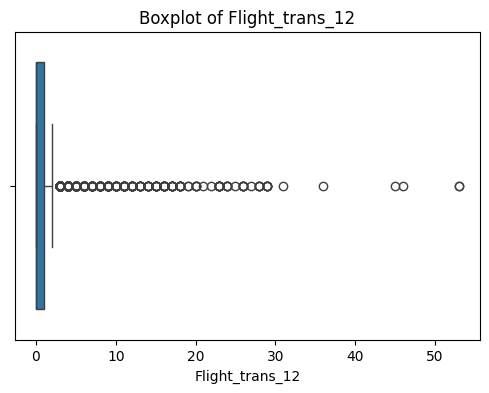

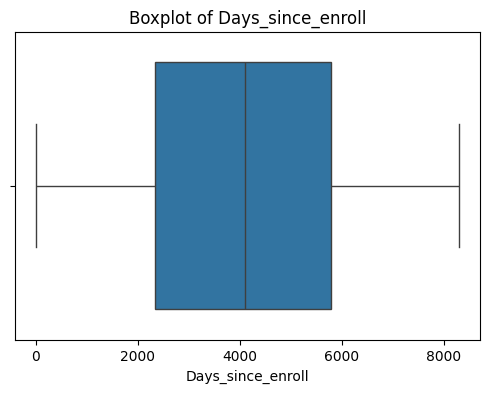

In [51]:
for col in df_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Presence of outliers is good, it represents most frequent flyers who contribute a lot.

# K-Means Clustering

In [52]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


In [54]:
from sklearn.preprocessing import StandardScaler

X = df.values
X_scaled = StandardScaler().fit_transform(X)

Scaling is important before applying any diatance based algorithm.

In [56]:
X_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [57]:
from sklearn.cluster import KMeans

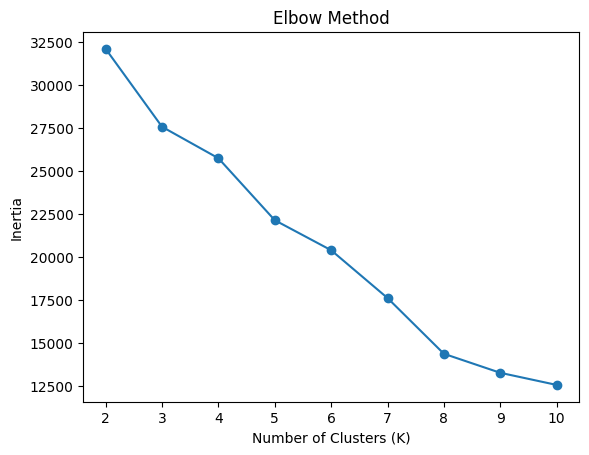

In [58]:
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [59]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


In [62]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.33170243934542987


In [64]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, clusters)
print("Davies–Bouldin Index:", db_score)


Davies–Bouldin Index: 1.2865773869620654


# DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.8,
    min_samples=5
)

clusters = dbscan.fit_predict(X_scaled)


In [90]:
mask = clusters != -1
X_clean = X_scaled[mask]
clusters_clean = clusters[mask]

In [91]:
sil_score = silhouette_score(X_clean, clusters_clean)
print("Silhouette Score (DBSCAN):", sil_score)

Silhouette Score (DBSCAN): 0.5881846616781253


In [92]:
db_score = davies_bouldin_score(X_clean, clusters_clean)
print("Davies–Bouldin Index (DBSCAN):", db_score)

Davies–Bouldin Index (DBSCAN): 1.360062203192945


# KMeans with PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Number of components selected:", pca.n_components_)


Number of components selected: 2


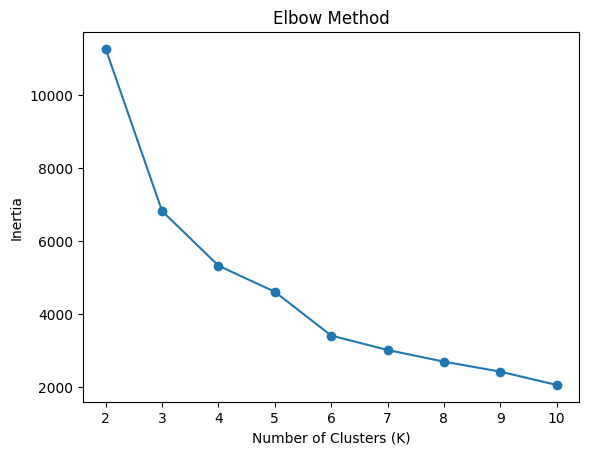

In [77]:

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['Cluster'] = clusters


In [79]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.5542286983112329


In [80]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_pca, clusters)
print("Davies–Bouldin Index:", db_score)


Davies–Bouldin Index: 0.7175702527667243


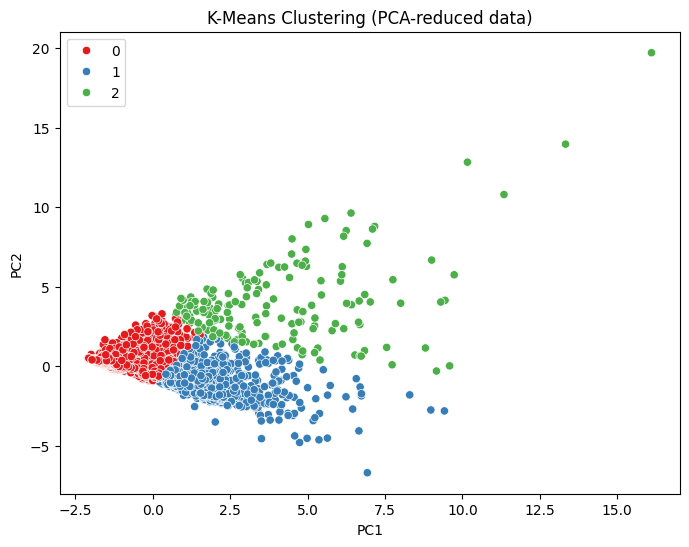

In [81]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette='Set1'
)
plt.title("K-Means Clustering (PCA-reduced data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Red Points - Infrequent Flyers
Blue Points - Moderate frequency Flyers
Green Points - Frequent Flyers

In [82]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [83]:
df['Cluster'].value_counts()

,count
Cluster,
0,2628
1,1202
2,169


# DBSCAN with PCA

In [84]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.8,        # start value, tune if needed
    min_samples=5
)

clusters = dbscan.fit_predict(X_pca)


In [85]:
df['DBSCAN_Cluster'] = clusters

In [86]:
df['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
0,3949
-1,35
1,5
3,5
2,5


In [87]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

mask = clusters != -1

sil_score = silhouette_score(X_pca[mask], clusters[mask])
db_score = davies_bouldin_score(X_pca[mask], clusters[mask])

print("Silhouette Score:", sil_score)
print("Davies–Bouldin Index:", db_score)


Silhouette Score: 0.6357247513159381
Davies–Bouldin Index: 0.2672287839481235


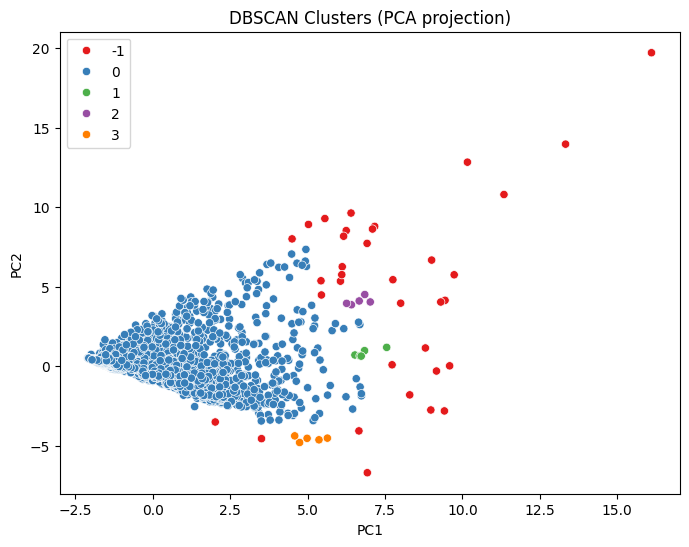

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=clusters,
    palette='Set1'
)

plt.title("DBSCAN Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [89]:
for eps in [0.5, 0.7, 1.0, 1.2]:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(X_scaled)
    print(eps, np.unique(labels, return_counts=True))


0.5 (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([1229, 1796,  177,   40,    7,  272,  436,    5,    5,    4,   10,
          7,    5,    6]))
0.7 (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 771, 1940,  506,  235,  116,  387,    5,   15,    6,    5,    4,
          9]))
1.0 (array([-1,  0,  1,  2,  3,  4]), array([ 476, 3478,   19,    7,    5,   14]))
1.2 (array([-1,  0,  1,  2]), array([ 368, 3600,   21,   10]))


The best value can maybe be obtained if we change eps to 0.7

# Evaluation and Performance Metrics

K-Means without PCA
Silhouette Score: 0.33170243934542987
Davies–Bouldin Index: 1.2865773869620654

DBSCAN without PCA
Silhouette Score (DBSCAN): 0.5881846616781253
Davies–Bouldin Index (DBSCAN): 1.360062203192945

K-Means with PCA
Silhouette Score: 0.5542286983112329
Davies–Bouldin Index: 0.7175702527667243



DBSCAN with PCA
Silhouette Score: 0.6357247513159381
Davies–Bouldin Index: 0.2672287839481235



The best score was achieved using DBSCAN.